# <center> Домашнее задание 5</center>

### **1. [15 баллов]** Изучите [набор данных](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset) по сотрудникам одной крупной IT компании. Посмотрите на описательные статистики по всем столбцам (как по количественным, так и по порядковым и категориалным переменным). В переменной ```JobSatisfaction``` приведите значения к бинарному виду. Значения $1$ и $2$ должны стать нулями, а значения от $3$ до $4$ - единицами. 

**2. [20 баллов]** Отберите N признаков (подвыборку наиболее важных, на ваш взгляд, признаков или все имеющиеся) и постройте модель логистической регрессии с k-fold кросс-валидацией ($k=5$) и $L_2$ регуляризацией, где в качестве целевой переменной будем предсказывать удовлетворенность работой по преобразованной переменной ```JobSatisfaction``` ($0$ - неудовлетворенность, $1$ - удовлетворенность). Напишите, какой это тип задачи машинного обучения (регрессия, кластеризация или что-то другое). Проинтерпретируйте полученные коэффициенты обученной модели. 

**3. [20 баллов]** Постройте дерево решений на всех признаках, используя энтропийный критерий, и визуализируйте его через библиотеку graphviz (или sklearn.export_graphiz и импорт изображения). Проинтерпретируйте, через какие предикаты в дереве (логические выражения признаков и их значений) Вы получили предсказания положительного класса (для всех листьев с предсказанием $1$).

**4. [20 баллов]** Обучите случайный лес и подберите к нему параметры ```n_estimators, max_depth, min_samples_leaf, max_features```, используя ```GridSearchCV``` или ```RandomizedSearchCV```.

**5. [25 баллов]** Создайте предсказания для вашей выборки, имитируя константный (всегда предсказывающий метку класса 1) и случайный (для каждого наблюдения равновероятно предсказывающий метки класса $1$ или $0$) классификаторы. Постройте ROC кривые для логистической регрессии, дерева решений, случайного леса, константного и случайного классификаторов на одном графике и сделайте выводы о качестве полученных моделей. Для лучшей (по метрике AUC) модели посчитайте матрицу ошибок, Accuracy, Precision и Recall. 

* **Бонусное [30 баллов]** Придумайте 10 новых признаков на основе имеющихся и при построении модели покажите, что суммарно они улучшают качество вашей лучшей модели хотя бы на 3% (по метрике AUC).

In [1]:
import  graphviz

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
from sklearn.model_selection import train_test_split
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition (2).csv')
df['JobSatisfaction'] = df['JobSatisfaction'].replace(1, 0)
df['JobSatisfaction'] = df['JobSatisfaction'].replace(2, 0)
df['JobSatisfaction'] = df['JobSatisfaction'].replace(3, 1)
df['JobSatisfaction'] = df['JobSatisfaction'].replace(4, 1)

data = pd.get_dummies(df)
data

data['JobSatisfaction']

0       1
1       0
2       1
3       1
4       0
       ..
1465    1
1466    0
1467    0
1468    0
1469    1
Name: JobSatisfaction, Length: 1470, dtype: int64

In [4]:
X = data.drop('JobSatisfaction', axis=1).values
y = data['JobSatisfaction'].values
data1 = data.drop('JobSatisfaction', axis=1)
data1

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes
0,41,1102,1,2,1,1,2,94,3,2,...,0,0,1,0,0,0,1,1,0,1
1,49,279,8,1,1,2,3,61,2,2,...,0,1,0,0,0,1,0,1,1,0
2,37,1373,2,2,1,4,4,92,2,1,...,0,0,0,0,0,0,1,1,0,1
3,33,1392,3,4,1,5,4,56,3,1,...,0,1,0,0,0,1,0,1,0,1
4,27,591,2,1,1,7,1,40,3,1,...,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,1,2061,3,41,4,2,...,0,0,0,0,0,1,0,1,1,0
1466,39,613,6,1,1,2062,4,42,2,3,...,0,0,0,0,0,1,0,1,1,0
1467,27,155,4,3,1,2064,2,87,4,2,...,0,0,0,0,0,1,0,1,0,1
1468,49,1023,2,3,1,2065,4,63,2,2,...,0,0,1,0,0,1,0,1,1,0


In [5]:
y.mean()

0.6129251700680272

In [6]:
Xtr, Xtest, Ytr, Ytest = train_test_split(X, y, test_size=0.2, stratify=y, random_state=67)

In [7]:
print(Ytest)
print('-----------')
print(Ytr[0:50])

[0 1 1 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 1
 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 1
 0 1 1 0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1
 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1 0 1 0 0
 1 1 0 0 1 0 0 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 0 1 1
 1 1 1 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 0 0
 0 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 0 0 0 1 1 0 1 0 1 1
 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0]
-----------
[0 1 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 0 1 0 1 1 1 1 0
 0 1 0 0 0 0 0 1 1 1 1 1 1]


In [8]:
model = LogisticRegression(penalty='l2',max_iter=10000)
model.fit(Xtr, Ytr)
print(model.coef_)
cv_results = cross_val_score(model, Xtr, Ytr, scoring='accuracy', cv=5)
cv_results.mean() #точноть модели 58%

[[ 1.00446786e-02  2.15141151e-04  5.28345721e-03  8.52663493e-03
   1.76937410e-04 -1.40770019e-04 -7.64424442e-02 -1.04533103e-02
  -7.46137230e-02  2.45741486e-02  5.68867594e-06  4.24825808e-06
  -5.37307418e-02  1.96745339e-02 -4.07864718e-02 -2.16879015e-02
   1.41549928e-02 -2.34869108e-02 -1.16345624e-02 -4.00542063e-02
   4.89339349e-03 -4.18182462e-03  3.24385592e-02 -7.38775568e-03
  -3.25426451e-02  1.43951849e-01 -1.43774912e-01  2.99810625e-02
   1.71554647e-02 -4.69595898e-02 -4.69707190e-02  3.25804202e-02
   1.45672363e-02 -2.26647106e-02  1.50316829e-01 -7.29614235e-02
  -4.10365444e-02 -1.06898936e-02 -2.78731967e-03 -1.89763095e-02
   1.91532469e-02  6.00054333e-02 -4.33796233e-02 -4.97084896e-02
  -2.01376492e-02 -1.38693241e-02 -1.69045457e-02  4.35882362e-02
   5.96097345e-02 -1.90268346e-02 -4.31015183e-02  1.92847914e-02
   2.39936643e-02  1.76937410e-04 -2.39150393e-02  2.40919767e-02]]


0.5867868734222863

In [9]:
pd.DataFrame(zip(data1.columns, np.transpose(model.coef_)))
# Полученный значения являются коэфициентами в функции Jobsatisfaction = 01004 * AGE + 0.00022 * DailyRate ... A55 * overtime_YES
#Если коэфициент положительный то чем больше переменная то с большей вероятностью работник будет удовлетворен

,0,1
0,Age,[0.010044678625984547]
1,DailyRate,[0.0002151411510768915]
2,DistanceFromHome,[0.0052834572128669915]
3,Education,[0.008526634932717466]
4,EmployeeCount,[0.000176937409946217]
5,EmployeeNumber,[-0.0001407700185229914]
6,EnvironmentSatisfaction,[-0.07644244417385723]
7,HourlyRate,[-0.010453310261543586]
8,JobInvolvement,[-0.07461372301189725]
9,JobLevel,[0.024574148566484957]


In [10]:
x_pred = model.predict_proba(Xtest)
y_pred = model.predict(Xtest)

In [11]:
np.mean(y_pred == Ytest)

0.5986394557823129

In [12]:
from sklearn.metrics import roc_auc_score, accuracy_score


In [13]:
accuracy_score(Ytest, y_pred)

0.5986394557823129

In [14]:
score = roc_auc_score(Ytest, y_pred)
print(score)

0.508187134502924


In [15]:
tr = 0.55
x_pred = model.predict_proba(Xtest)[:,-1]
y_pred = 1*(x_pred>tr)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0])

In [16]:
accuracy_score(Ytest, y_pred)

0.5680272108843537

In [17]:
score = roc_auc_score(Ytest, y_pred)
print(score)

0.5057017543859649


In [18]:
from sklearn.metrics import confusion_matrix

In [19]:
confusion_matrix(y_pred, Ytest)

array([[ 26,  39],
       [ 88, 141]], dtype=int64)

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

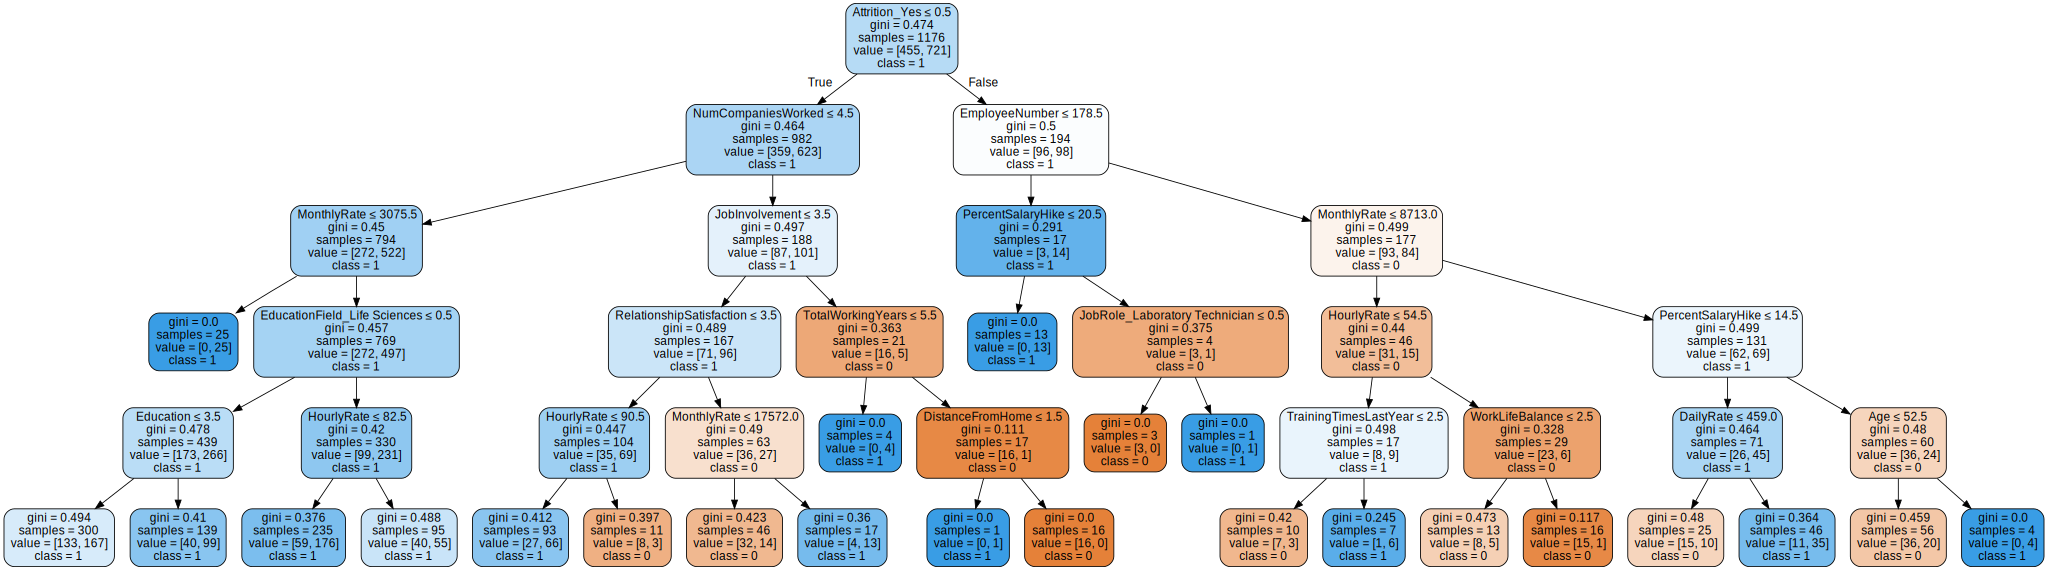

In [21]:

modeltree = DecisionTreeClassifier(max_depth=5)
modeltree.fit(Xtr, Ytr)
dot_data = tree.export_graphviz(modeltree, out_file=None, 
                     feature_names=data1.columns,  
                     class_names=['0', '1'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
graph 
#Очень много путей для получения 1. Одним из них путь будет, где человек не истощен,
# работал в менее чем 5 компаниях, месячная ставка меньше 3075. с такими показателями 0 неудовлетворенных работников и 25 удовлетворенных

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [23]:
model_forest = RandomForestClassifier()
model_forest = model_forest.fit(Xtr, Ytr)
model_forest

RandomForestClassifier()

In [24]:
parameters = {'n_estimators': [10, 20, 50, 70],
              'min_samples_leaf': [5, 7, 10],
             'max_depth': [3, 4, 5, 6],
             'max_features': [2, 3, 4]}
model_grid = GridSearchCV(estimator=model_forest, param_grid=parameters, scoring='roc_auc', cv=5, n_jobs=-1)
model_grid.fit(X, y)
print('Лучший результат:', model_grid.best_score_)
print('Лучшие параметры:', model_grid.best_params_)

Лучший результат: 0.5468704234088155
Лучшие параметры: {'max_depth': 6, 'max_features': 4, 'min_samples_leaf': 10, 'n_estimators': 20}


In [25]:
model_grid = RandomizedSearchCV(estimator=model_forest, param_distributions=parameters, scoring='roc_auc', cv=5, n_jobs=-1)
model_grid.fit(X, y)
print('Лучший результат:', model_grid.best_score_)
print('Лучшие параметры:', model_grid.best_params_)

Лучший результат: 0.5271970268162951
Лучшие параметры: {'n_estimators': 50, 'min_samples_leaf': 10, 'max_features': 3, 'max_depth': 5}
